<a href="https://colab.research.google.com/github/Yuvraj-Jaiswal/Image-Colorization-Deep-leaning/blob/main/Color_Gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Conv2DTranspose
from tensorflow.keras import Sequential
import cv2
from keras.preprocessing.image import ImageDataGenerator

(x_train , _) , (x_test , _)  = cifar10.load_data()

Grayscale_images = []
for img in x_train:
  frame = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  Grayscale_images.append(frame[:,:,1])
Grayscale_images = np.array(Grayscale_images)

Grayscale_images = Grayscale_images.reshape(50000,32,32,1)
Color_images = x_train

Grayscale_images = Grayscale_images/255
Color_images = Color_images/255

Grayscale_images_test = []
for img in x_test:
  frame = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  Grayscale_images_test.append(frame[:,:,1])
Grayscale_images_test = np.array(Grayscale_images_test)

Grayscale_images_test = Grayscale_images_test.reshape(10000,32,32,1)
Color_images_test = x_test

Grayscale_images_test = Grayscale_images_test/255
Color_images_test = Color_images_test/255

print(Grayscale_images.shape)
print(Color_images.shape)
print(Grayscale_images_test.shape)
print(Color_images_test.shape)

# image_gen = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,
#         height_shift_range=0.1,shear_range=0.2,zoom_range=0.1,fill_mode='nearest'
#         ,horizontal_flip=True,rescale=1/255)

# data_train = image_gen.flow(x=x_train,y=y_train_cat, batch_size=64,shuffle=True)
# data_test = image_gen.flow(x=x_test[100::],y=y_test_cat[100::], batch_size=64,shuffle=True)


(50000, 32, 32, 1)
(50000, 32, 32, 3)
(10000, 32, 32, 1)
(10000, 32, 32, 3)


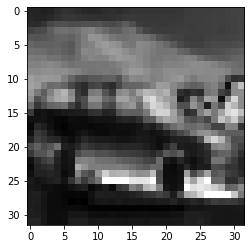

In [ ]:
plt.imshow(Grayscale_images[4].reshape(32,32),cmap='gray')

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32 , kernel_size=(3,3), input_shape=(32,32,1) , activation='relu', padding='same'))

model.add(Conv2D(filters=64 , kernel_size=(3,3), activation='relu' , padding='same'))

model.add(Conv2D(filters=128 , kernel_size=(3,3), activation='relu' , padding='same'))

model.add(Conv2D(filters=256 , kernel_size=(3,3), activation='relu' , strides=(2,2) ,  padding='same'))

model.add(Conv2DTranspose(filters=128 , kernel_size=(3,3),  activation='relu', strides=(2,2) ,  padding='same'))

model.add(Conv2DTranspose(filters=64 , kernel_size=(3,3), activation='relu' , padding='same'))

model.add(Conv2DTranspose(filters=32 , kernel_size=(3,3), activation='relu'  ,  padding='same'))

model.add(Conv2DTranspose(filters=3 , kernel_size=(3,3), activation='relu' , padding='same'))

model.compile(loss='binary_crossentropy' , optimizer='adam')
model.fit(x = Grayscale_images,y =Color_images , epochs=100 ,validation_data=(Grayscale_images_test,Color_images_test))

Epoch 1/100
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6619 - val_loss: 0.6377
Epoch 2/100
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6309 - val_loss: 0.6253
Epoch 3/100
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6246 - val_loss: 0.6196
Epoch 4/100
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6287 - val_loss: 0.6244
Epoch 5/100
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6247 - val_loss: 0.6316
Epoch 6/100
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6205 - val_loss: 0.6193
Epoch 7/100
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6174 - val_loss: 0.6176
Epoch 8/100
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6149 - val_loss: 0.6318
Epoch 9/100
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6183 - val_loss: 0.6153
Epoch 10/100
1563/1563 [==============================]


Grayscale images



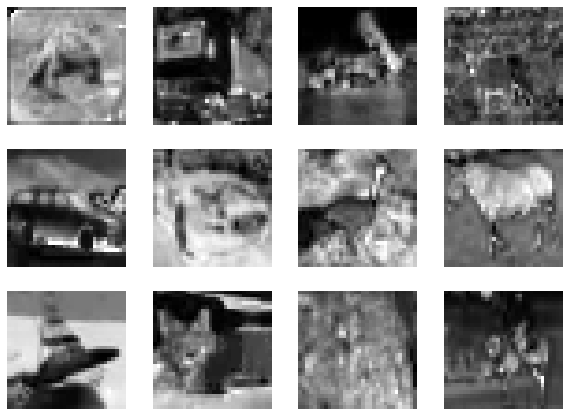


Colored Generated images



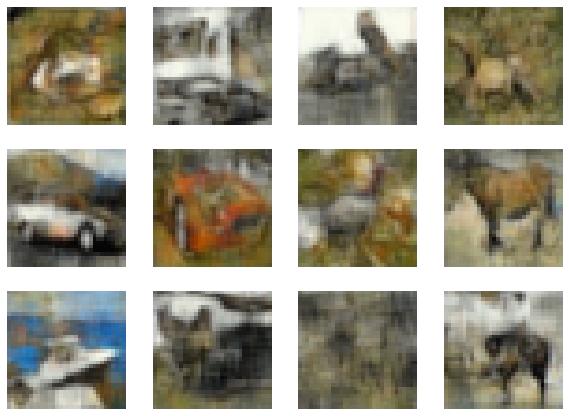


Colored Real images



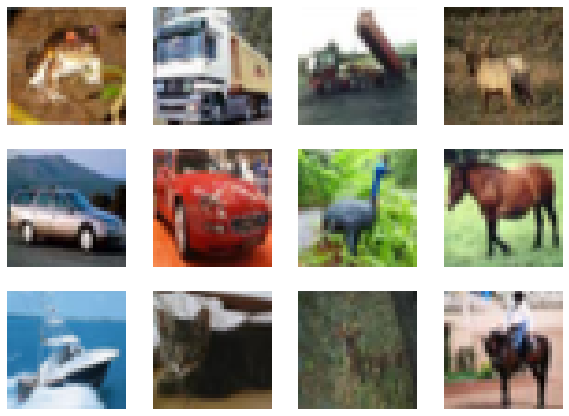

In [ ]:
Generated_Image_Sample = model.predict(Grayscale_images[0:12])

print("")
print("Grayscale images")
print("")

plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,4,i+1)
  plt.imshow(Grayscale_images[i].reshape(32,32),cmap='gray')
  plt.axis('off')
plt.show()

print("")
print("Colored Generated images")
print("")

plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,4,i+1)
  plt.imshow(Generated_Image_Sample[i].reshape(32,32,3))
  plt.axis('off')
plt.show()

print("")
print("Colored Real images")
print("")

plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,4,i+1)
  plt.imshow(Color_images[i].reshape(32,32,3))
  plt.axis('off')
plt.show()